# Libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np


# Dataset

In [17]:
data_path = "eda/train_merged.csv"
df = pd.read_csv(data_path)
df.head()

,id,date,store_nbr,family,sales,onpromotion,day_type,day_locale,day_locale_name,day_description,day_transferred,oil_price,store_city,store_state,store_type,store_cluster
0,73062,2013-02-11,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13
1,73063,2013-02-11,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13
2,73064,2013-02-11,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13
3,73065,2013-02-11,1,BEVERAGES,172.0,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13
4,73066,2013-02-11,1,BOOKS,0.0,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13


In [18]:
df.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'day_type',
       'day_locale', 'day_locale_name', 'day_description', 'day_transferred',
       'oil_price', 'store_city', 'store_state', 'store_type',
       'store_cluster'],
      dtype='object')

# EDA

In [19]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,day_type,day_locale,day_locale_name,day_description,day_transferred,oil_price,store_city,store_state,store_type,store_cluster
0,73062,2013-02-11,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13
1,73063,2013-02-11,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13
2,73064,2013-02-11,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13
3,73065,2013-02-11,1,BEVERAGES,172.0,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13
4,73066,2013-02-11,1,BOOKS,0.0,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13


In [20]:
df.describe()

,id,store_nbr,sales,onpromotion,oil_price,store_cluster
count,3.225420e+05,322542.000000,322542.000000,322542.000000,322542.000000,322542.000000
mean,1.612773e+06,27.500000,375.094147,3.371877,65.369558,8.481481
std,7.873296e+05,15.585808,1202.767319,15.064912,25.489987,4.649741
min,7.306200e+04,1.000000,0.000000,0.000000,27.960000,1.000000
25%,9.716352e+05,14.000000,0.000000,0.000000,44.880000,4.000000
50%,1.692008e+06,27.500000,13.000000,0.000000,52.010000,8.500000
75%,2.181836e+06,41.000000,208.360000,0.000000,95.250000,13.000000
max,3.000887e+06,54.000000,124717.000000,716.000000,107.950000,17.000000


In [21]:
df.isna().sum()

id                 0
date               0
store_nbr          0
family             0
sales              0
onpromotion        0
day_type           0
day_locale         0
day_locale_name    0
day_description    0
day_transferred    0
oil_price          0
store_city         0
store_state        0
store_type         0
store_cluster      0
dtype: int64

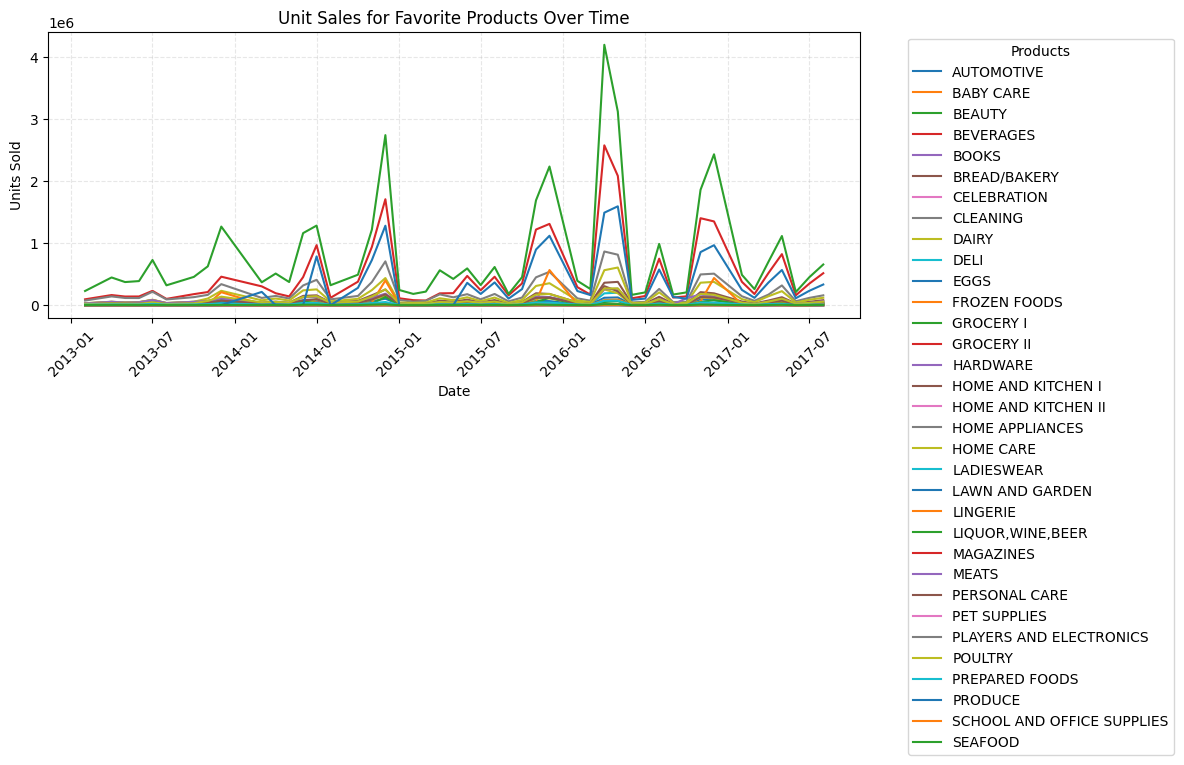

In [22]:
# Unit sales for each product

df['date'] = pd.to_datetime(df['date'])
ts = (
    df.groupby([df['date'].dt.to_period("M"), 'family'])['sales']
    .sum()
    .reset_index()
)
ts['date'] = ts['date'].dt.to_timestamp()

# Plot
ts_pivot = ts.pivot(index='date', columns='family', values='sales')
plt.figure(figsize=(12,6))
for product in ts_pivot.columns:
    plt.plot(ts_pivot.index, ts_pivot[product], label=product)

plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.title("Unit Sales for Favorite Products Over Time")
plt.legend(title="Products", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


In [23]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,day_type,day_locale,day_locale_name,day_description,day_transferred,oil_price,store_city,store_state,store_type,store_cluster
0,73062,2013-02-11,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13
1,73063,2013-02-11,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13
2,73064,2013-02-11,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13
3,73065,2013-02-11,1,BEVERAGES,172.0,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13
4,73066,2013-02-11,1,BOOKS,0.0,0,Holiday,National,Ecuador,Carnaval,False,97.01,Quito,Pichincha,D,13


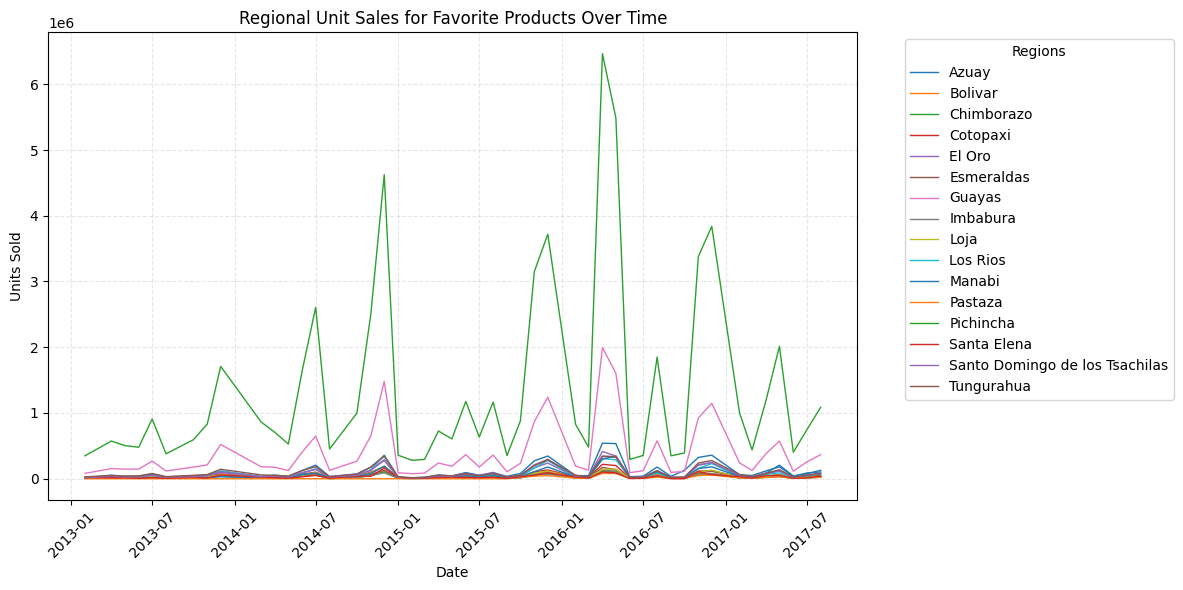

In [24]:
# Regional unit sales for each product

df['date'] = pd.to_datetime(df['date'])
ts = (
    df.groupby([df['date'].dt.to_period("M"), 'store_state'])['sales']
    .sum()
    .reset_index()
)
ts['date'] = ts['date'].dt.to_timestamp()

# Plot
ts_pivot = ts.pivot(index='date', columns='store_state', values='sales')
plt.figure(figsize=(12,6))
for region in ts_pivot.columns:
    plt.plot(ts_pivot.index, ts_pivot[region], label=region, linewidth=1)

plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.title("Regional Unit Sales for Favorite Products Over Time")
plt.legend(title="Regions", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()


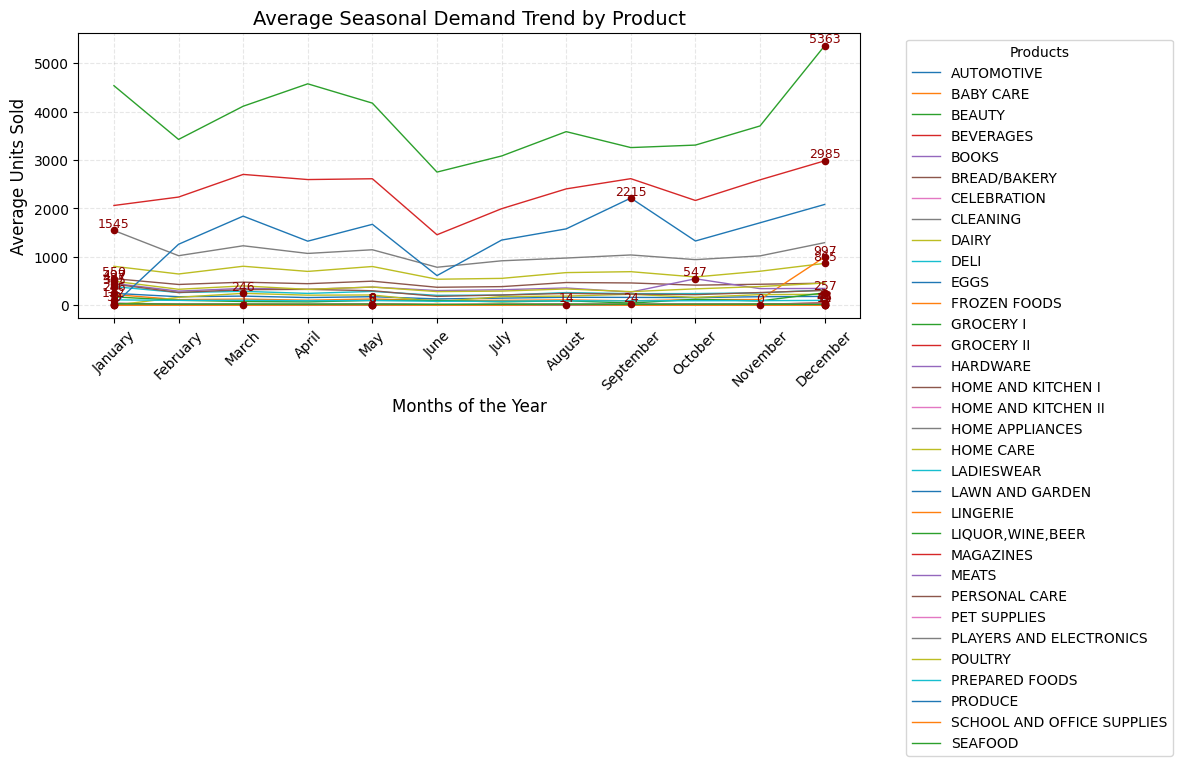

In [25]:
# Seasonal Demand for each Product
df['date'] = pd.to_datetime(df['date'])
df['MonthName'] = df['date'].dt.month_name()

# Aggregate: average monthly sales per product
seasonal = (
    df.groupby(['MonthName','family'])['sales']
    .mean()
    .reset_index()
    .pivot(index='MonthName', columns='family', values='sales')
    .reindex(
        months_order := ["January","February","March","April","May","June",
                         "July","August","September","October","November","December"]
        )
    )

# Plot
plt.figure(figsize=(12,6))

for product in seasonal.columns:
    plt.plot(seasonal.index, seasonal[product], linewidth=1, label=product)

    # Find the max month + value for this product
    max_idx = seasonal[product].idxmax()
    max_val = seasonal[product].max()

    # Highlight the spike
    plt.scatter(max_idx, max_val, color="darkred", s=20, zorder=5)
    plt.text(max_idx, max_val, f"{max_val:.0f}",
             ha="center", va="bottom", fontsize=9, color="darkred")

plt.xlabel("Months of the Year", fontsize=12)
plt.ylabel("Average Units Sold", fontsize=12)
plt.title("Average Seasonal Demand Trend by Product", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.3)
plt.legend(title="Products", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


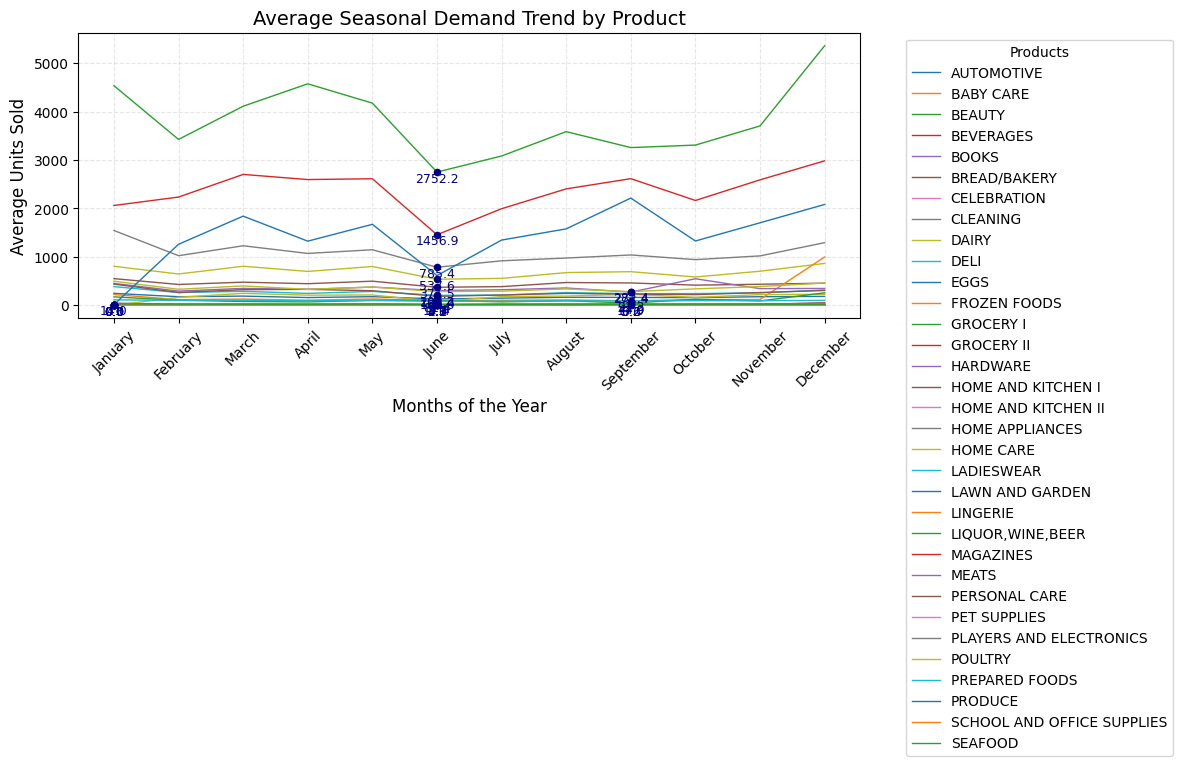

In [26]:
plt.figure(figsize=(12,6))
for product in seasonal.columns:
    plt.plot(seasonal.index, seasonal[product], linewidth=1, label=product)

    # Find the min month + min value for this product
    min_month = seasonal[product].idxmin()
    min_value = seasonal[product].min()

    # Highlight with scatter
    plt.scatter(min_month, min_value, color="darkblue", s=20, zorder=5)

    # Annotate the min spike
    plt.text(min_month, min_value, f"{min_value:.1f}",
             ha="center", va="top", fontsize=9, color="darkblue")

plt.xlabel("Months of the Year", fontsize=12)
plt.ylabel("Average Units Sold", fontsize=12)
plt.title("Average Seasonal Demand Trend by Product", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.3)
plt.legend(title="Products", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# ARIMA

In [28]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [27]:
df['date'] = pd.to_datetime(df['date'])

# Group by Product and Date (monthly resample)
ts = (
    df.groupby(['family', pd.Grouper(key='date')])['sales']
    .sum()
    .reset_index()
)

In [69]:
def get_prod_data(prod_name):
  data = ts[ts['family'] == prod_name].copy()
  data.drop('family', axis=1, inplace=True)

  # Make sure Units Sold is numeric
  data['sales'] = pd.to_numeric(data['sales'], errors='coerce')

  # --- Ensure datetime format and sorting ---
  data['date'] = pd.to_datetime(data['date'])
  data = data.sort_values('date')
  data.set_index('date', inplace=True)
  data = data.asfreq('D').fillna(0)

  # Split data into train and test
  train_size = int(len(data) * 0.8)
  train, test = data.iloc[:train_size], data.iloc[train_size:]

  return train, test


# def train_model(train, test, prod_name):
#   # --- Fit ARIMA model ---
#   model = ARIMA(train['sales'], order=(2,1,3))
#   model_fit = model.fit()

#   # Forecast over the test period
#   forecast = model_fit.forecast(steps=len(test))

#   # Plot Train, Test, and Forecast
#   plt.figure(figsize=(12,6))
#   plt.plot(train.index, train['sales'], label="Train")
#   plt.plot(test.index, test['sales'], label="Test (True)", color="green")
#   plt.plot(test.index, forecast, label="Forecast (Predicted)", color="orange")

#   plt.title(f"ARIMA Forecast - {prod_name}")
#   plt.xlabel("Date")
#   plt.ylabel("Sales")
#   plt.legend()
#   plt.show()

#   test_units = test['sales']

#   y_true = test_units.values
#   y_pred = forecast.values


#   # calculate MAE
#   mae = float(np.abs(y_true - y_pred).mean())
#   print(f"MAE: {mae:.4f}")
  
#   # calculate WAPE
#   denom = np.abs(y_true).sum() + 1e-8
#   wape = float(np.abs(y_true - y_pred).sum() / denom)
#   print(f"WAPE: {wape:.4f}")

#   # calculate SMAPE
#   denom = (np.abs(y_true) + np.abs(y_pred)) + 1e-8
#   smape = float((2.0 * np.abs(y_true - y_pred) / denom).mean())
#   print(f"SMAPE: {smape:.4f}")
#   return mae, wape, smape

In [70]:
def calc_mae(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    "Calculates Mean Absolute Error"
    return float(np.abs(y_true - y_pred).mean())


def calc_wape(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    "Calculates Weighted Absolute Percentage Error"
    denom = np.abs(y_true).sum() + 1e-8
    return float(np.abs(y_true - y_pred).sum() / denom)


def calc_smape(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    "Calculates Symmetric Mean Absolute Percentage Error"
    denom = (np.abs(y_true) + np.abs(y_pred)) + 1e-8
    return float((2.0 * np.abs(y_true - y_pred) / denom).mean())


def compute_metrics(y_true, y_pred):
    """
    Metric computation for classification tasks.
    MAE, WAPE, sMAPE
    Computes ROC AUC and PR AUC using continuous scores.
    """
    y_true = np.concatenate(y_true, axis=0)
    y_pred = np.concatenate(y_pred, axis=0)

    metrics = {}
    metrics["mae"] = calc_mae(y_true, y_pred)
    metrics["wape"] = calc_wape(y_true, y_pred)
    metrics["smape"] = calc_smape(y_true, y_pred)

    return metrics

/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


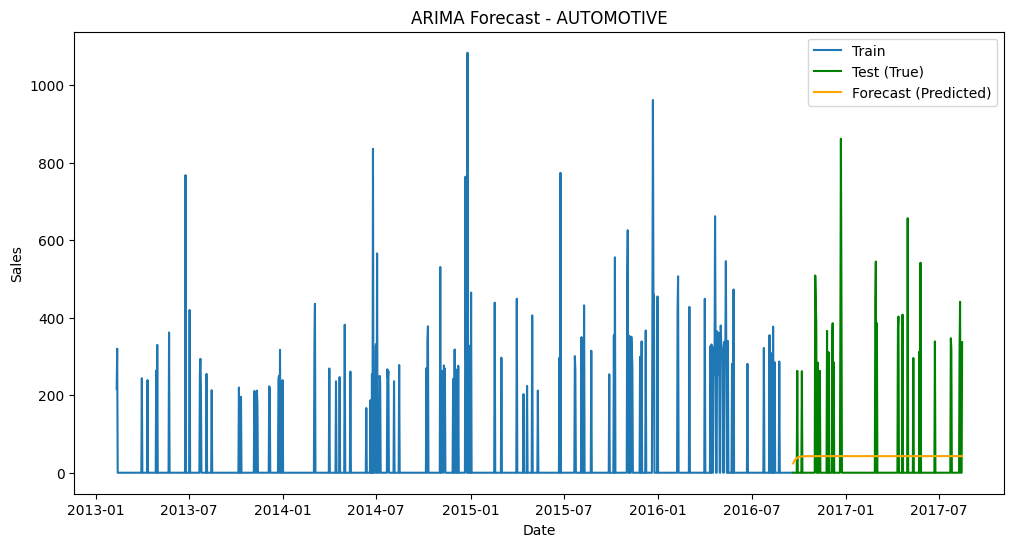

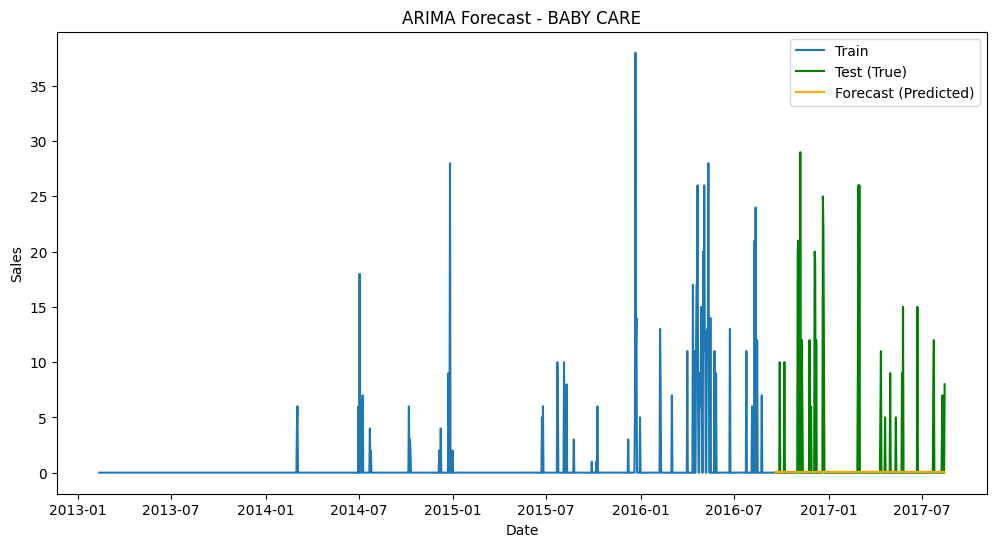

/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


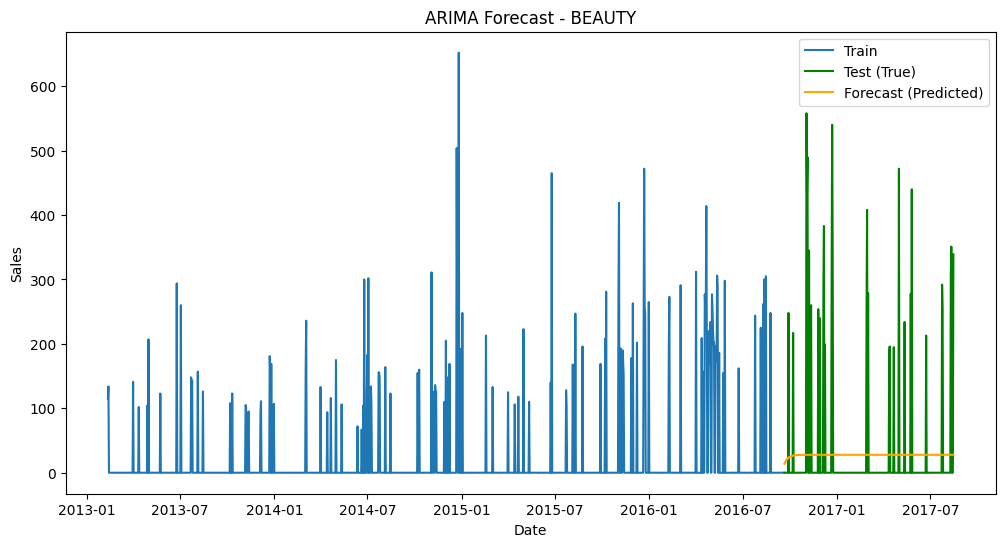

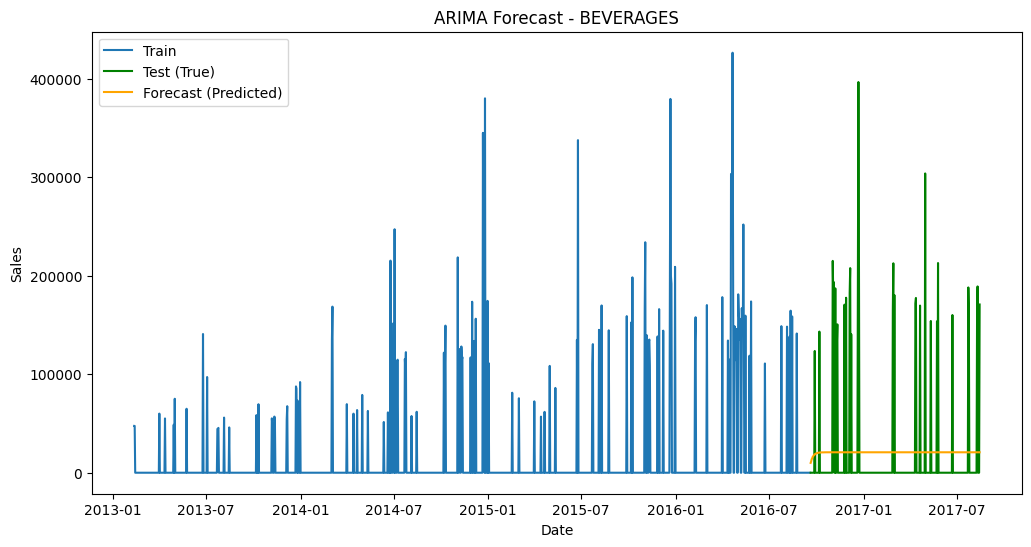

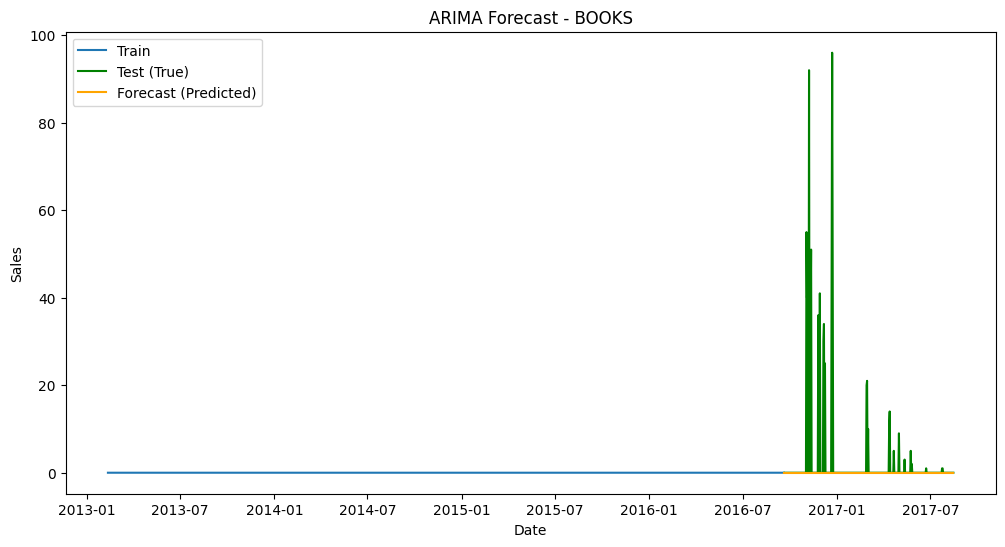

/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


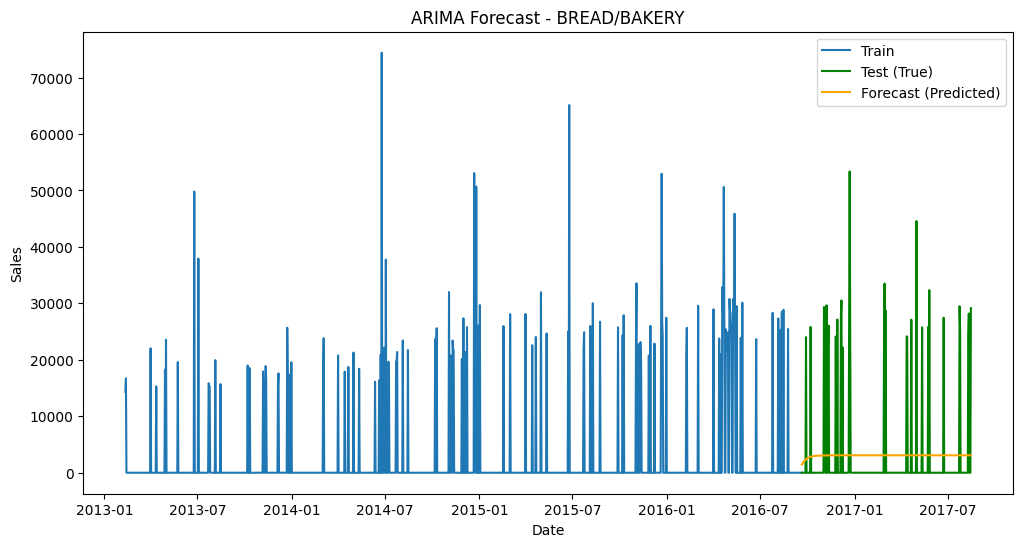

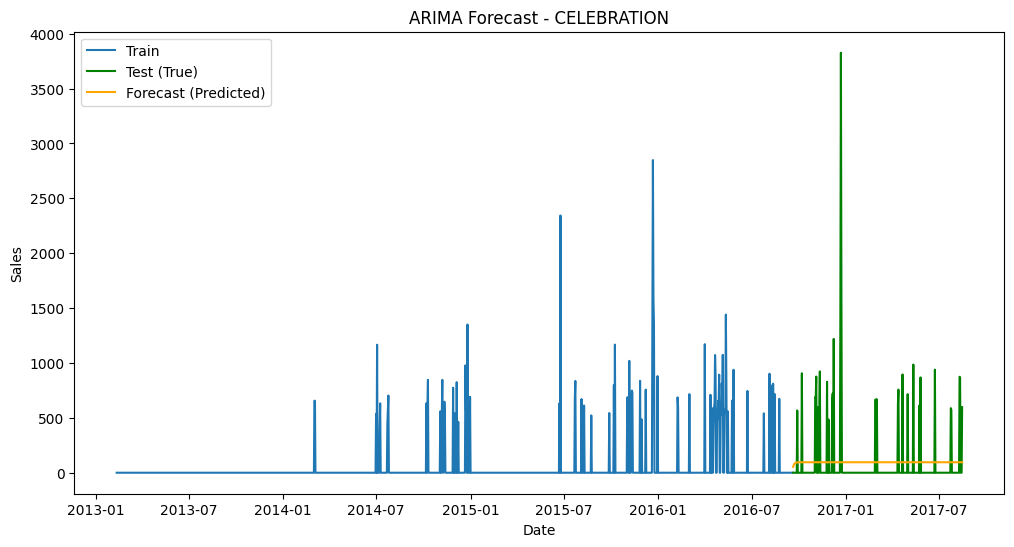

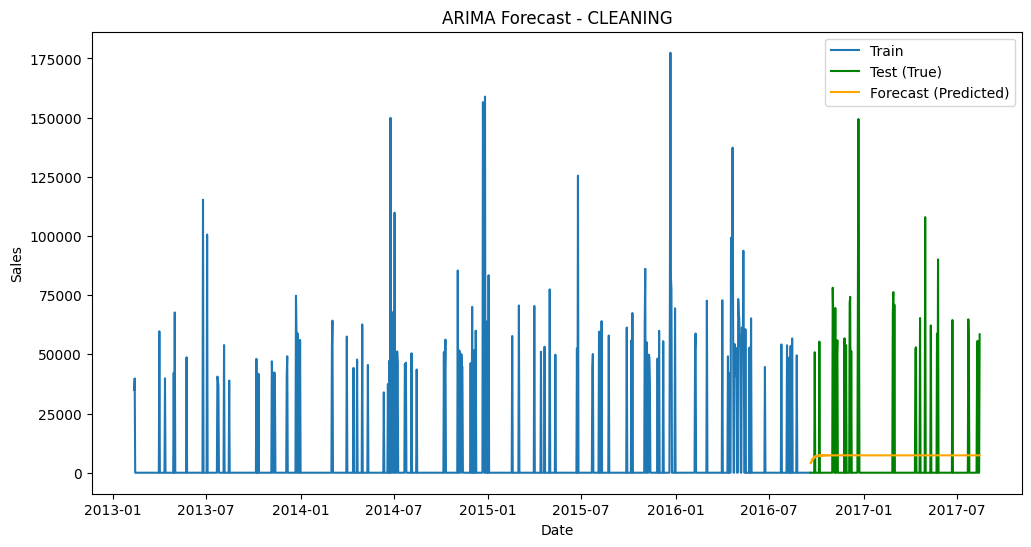

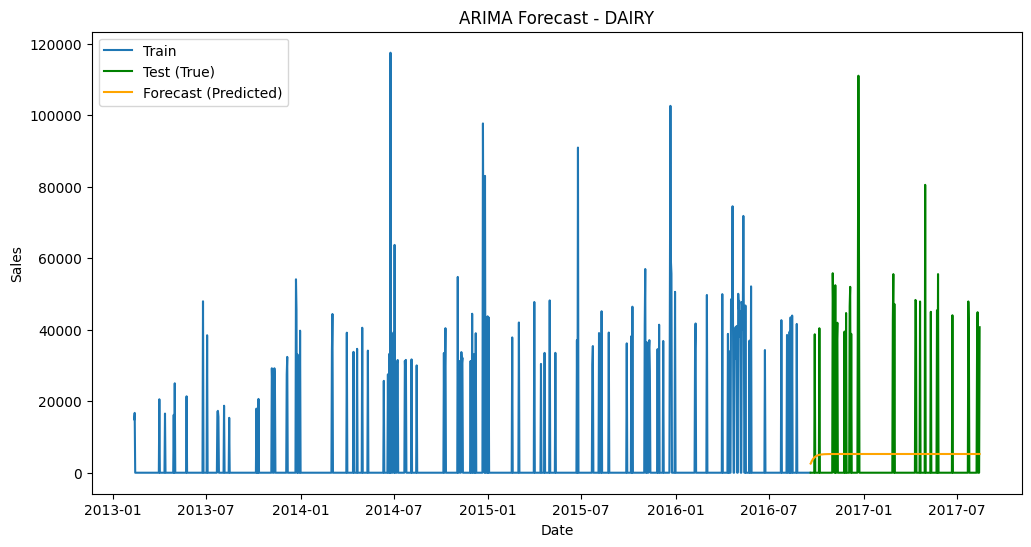

/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


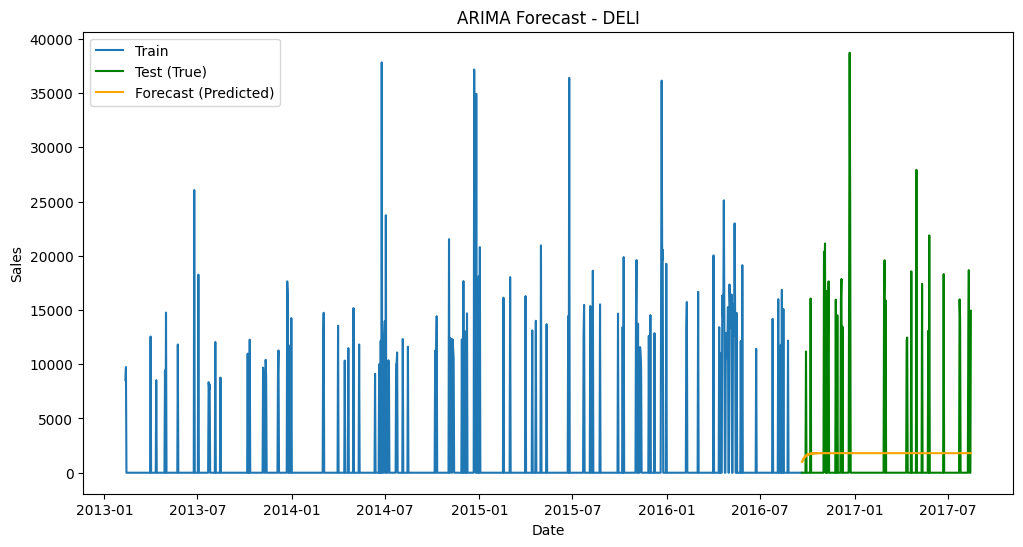

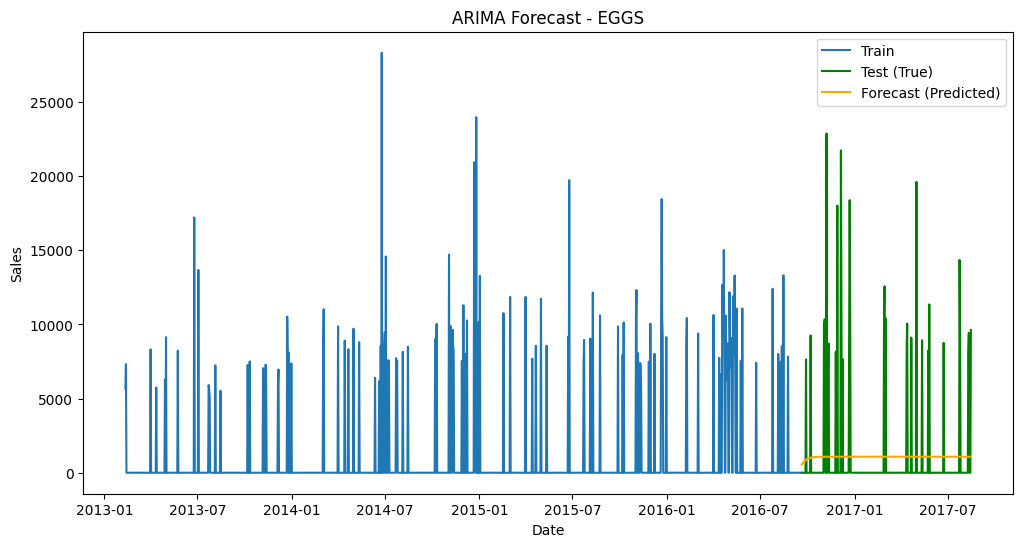

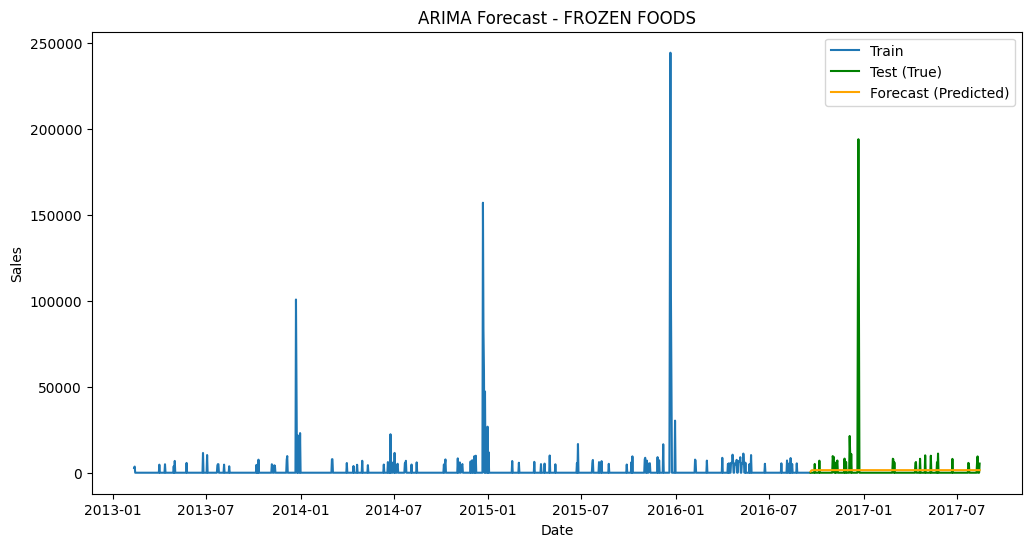

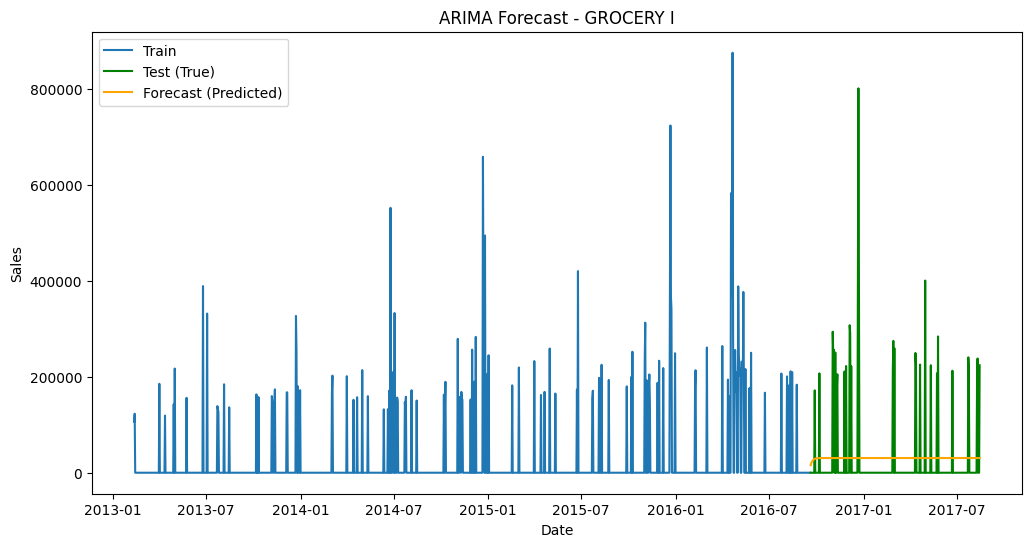

/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


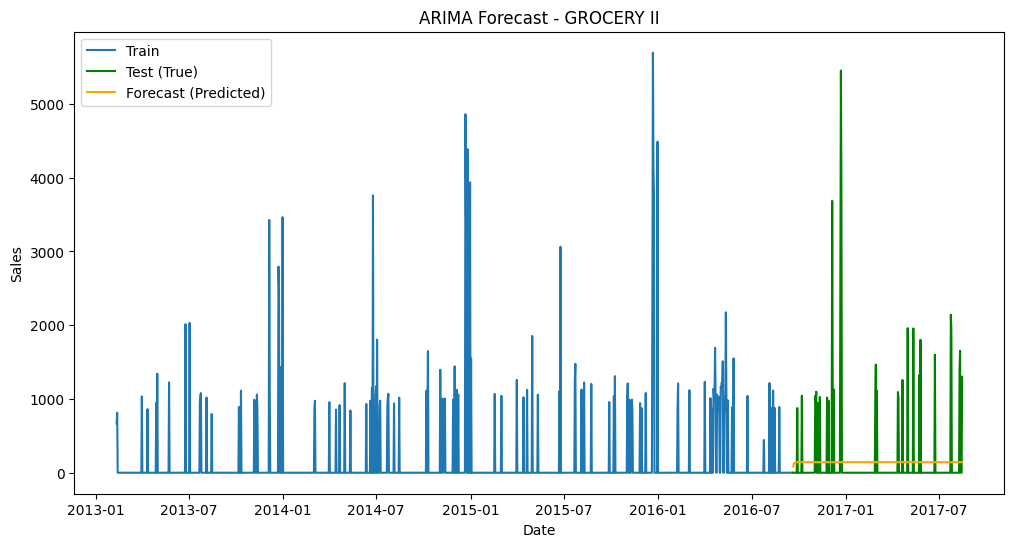

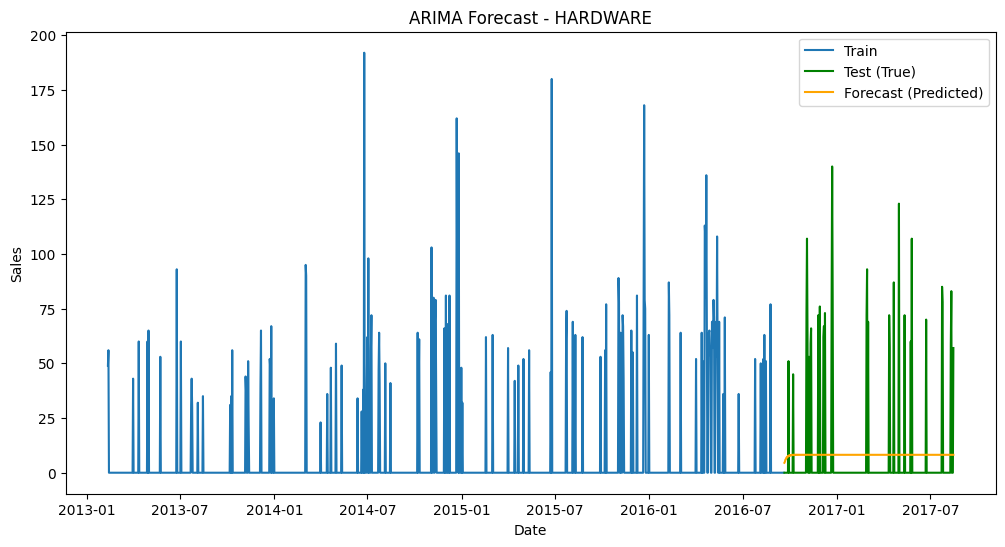

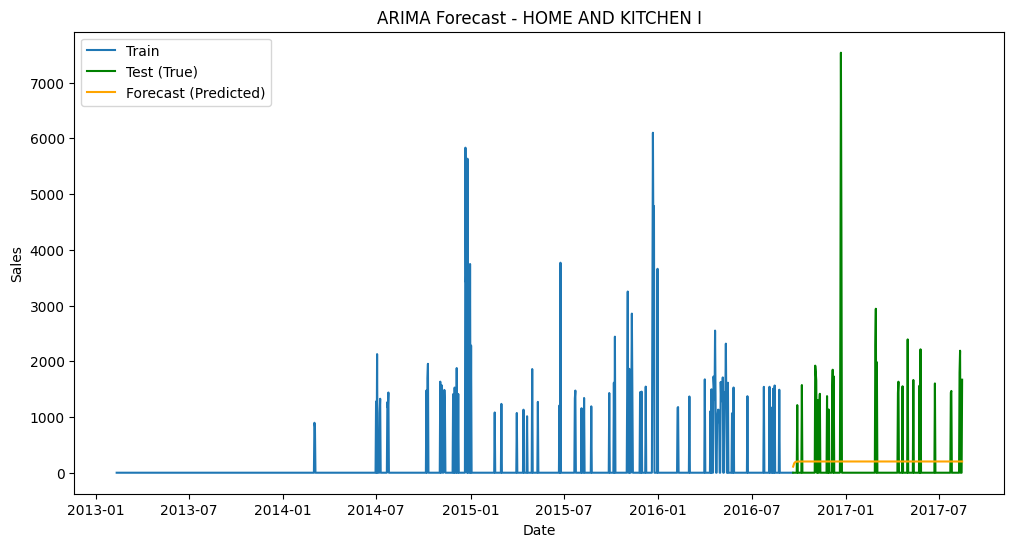

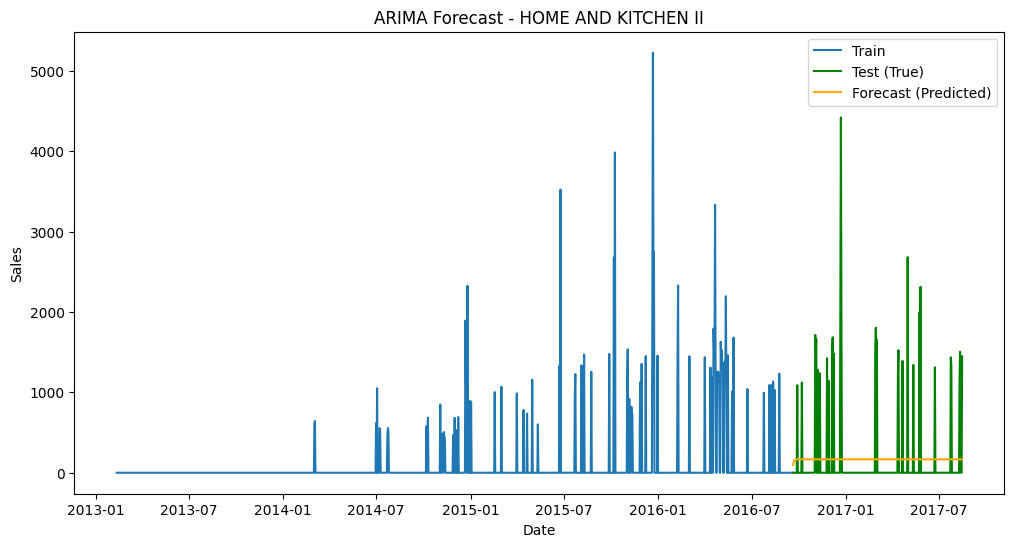

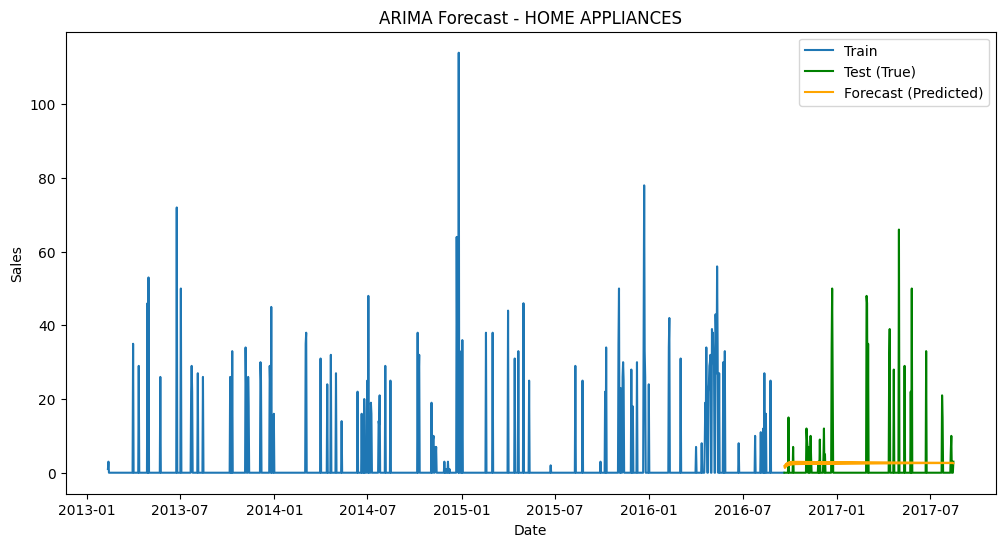

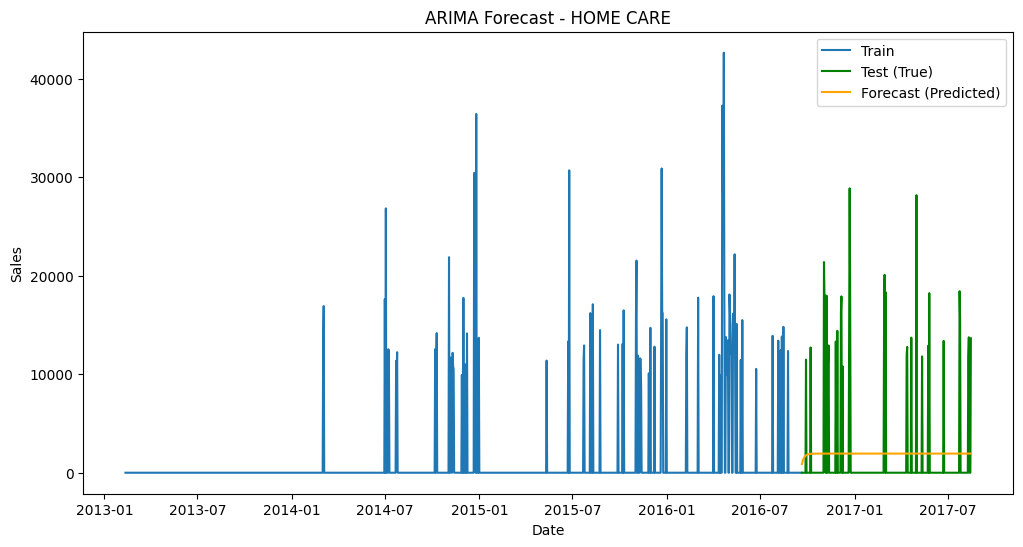

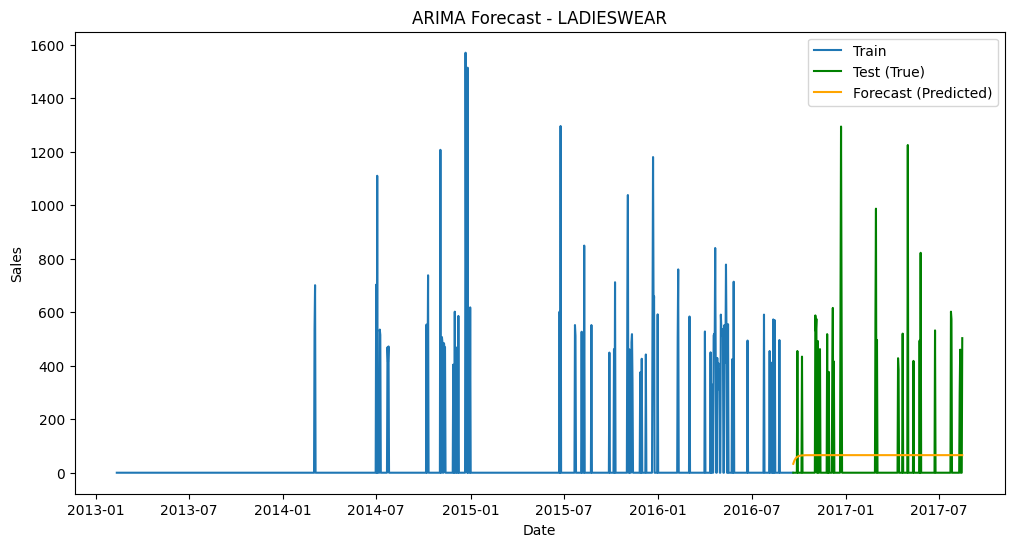

/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


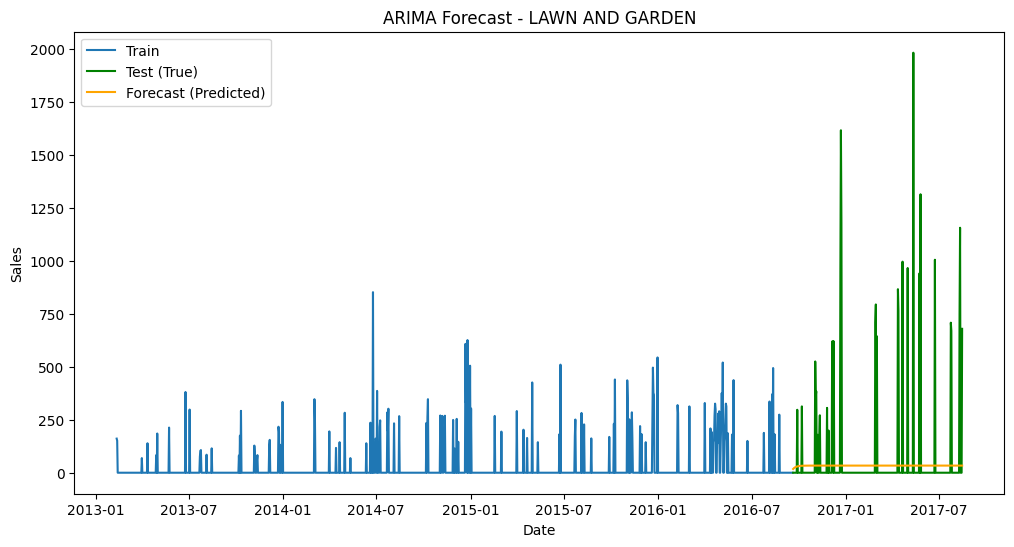

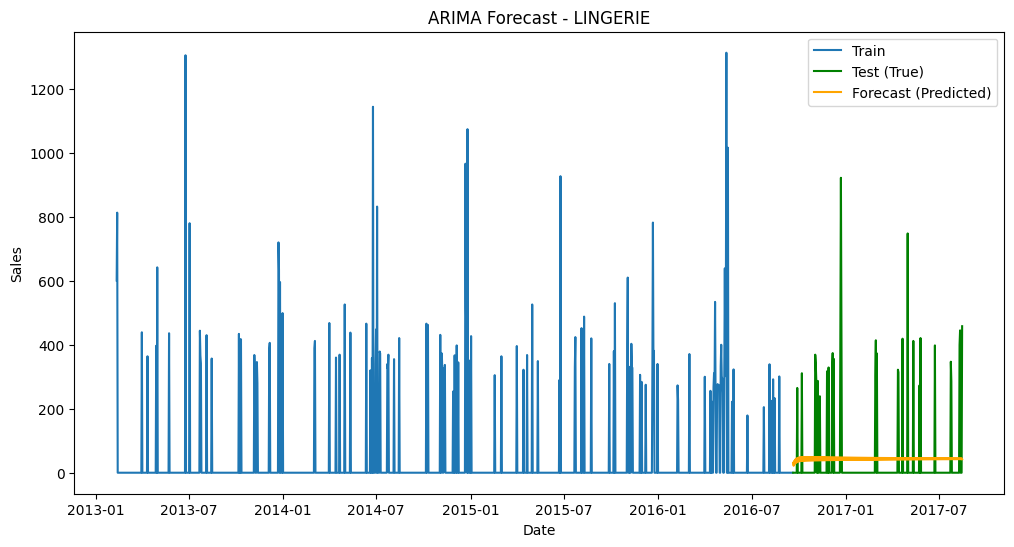

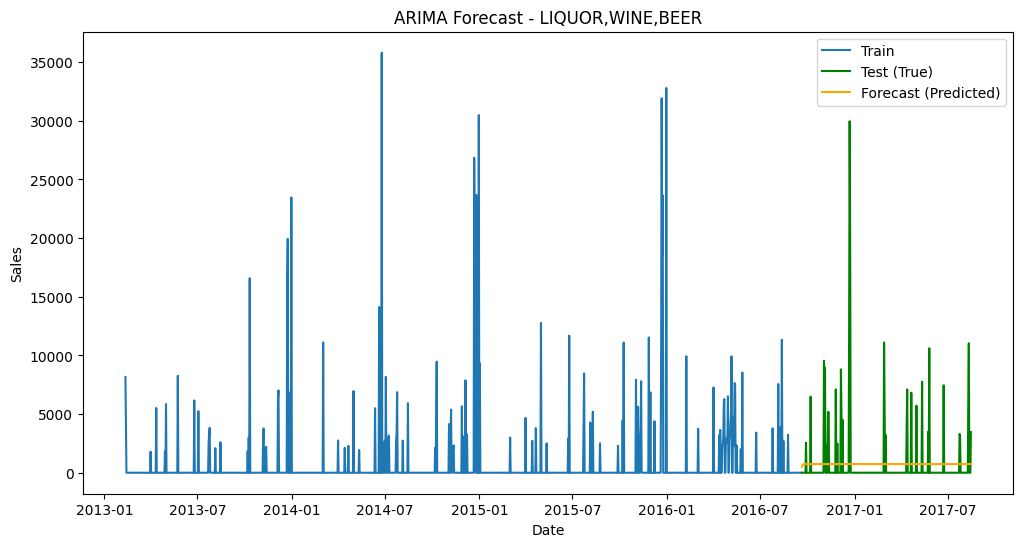

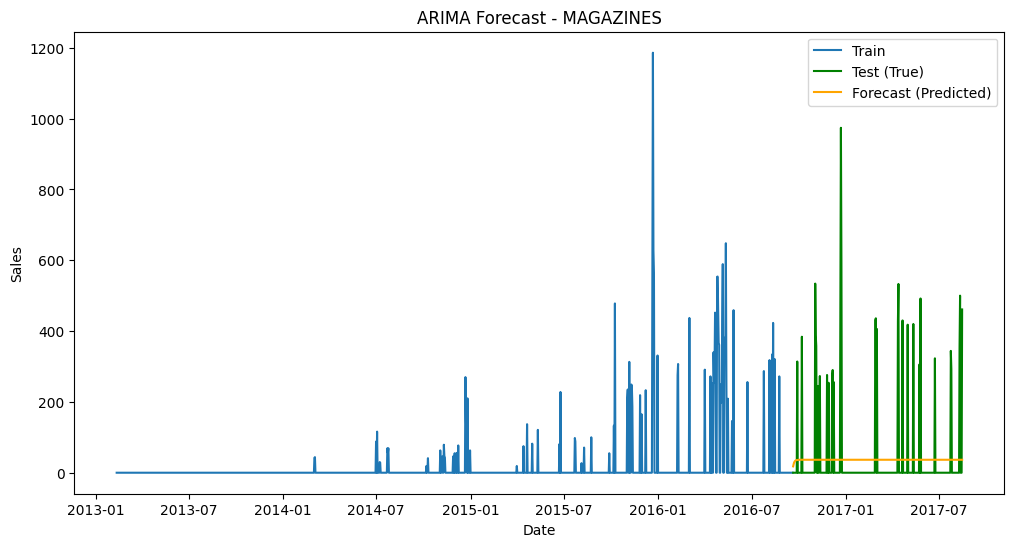

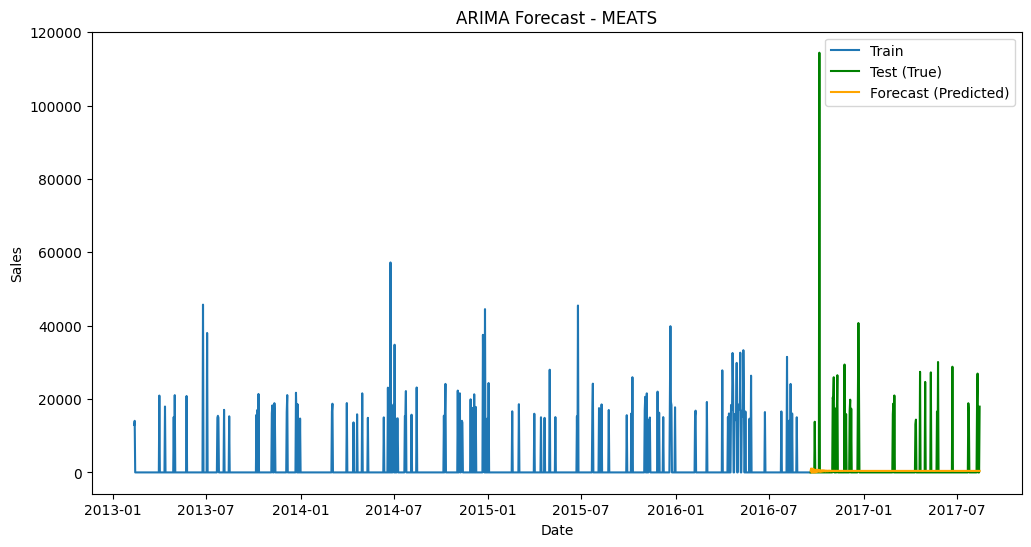

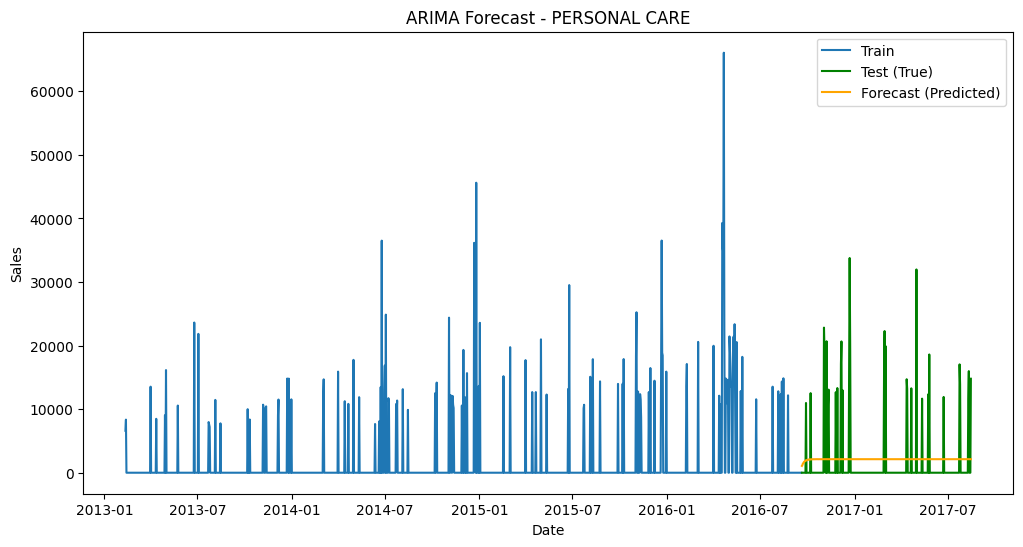

/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


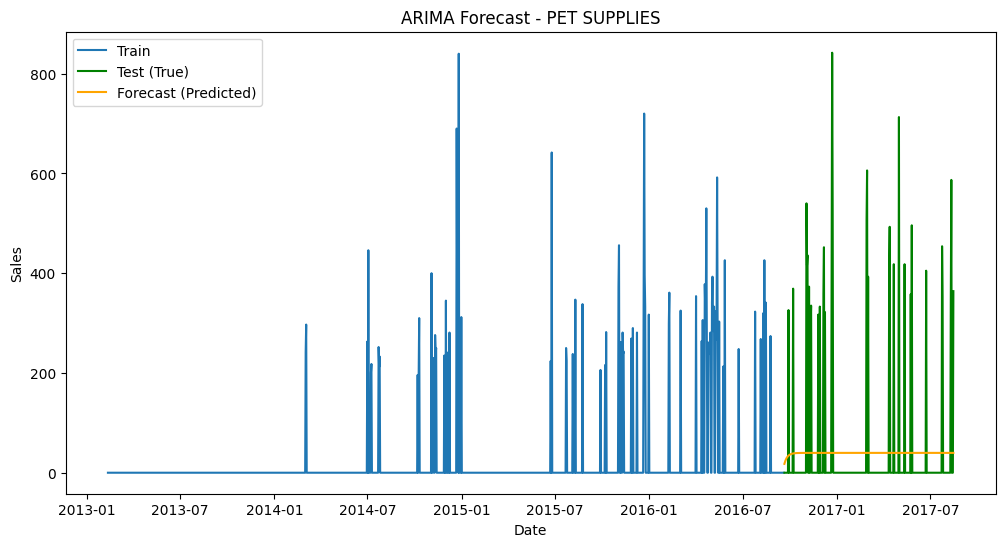

/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


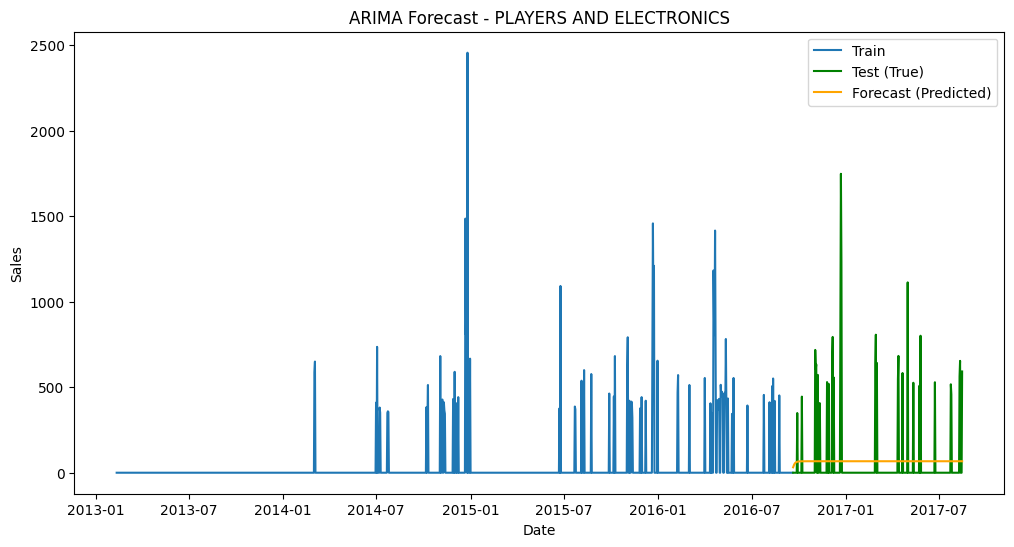

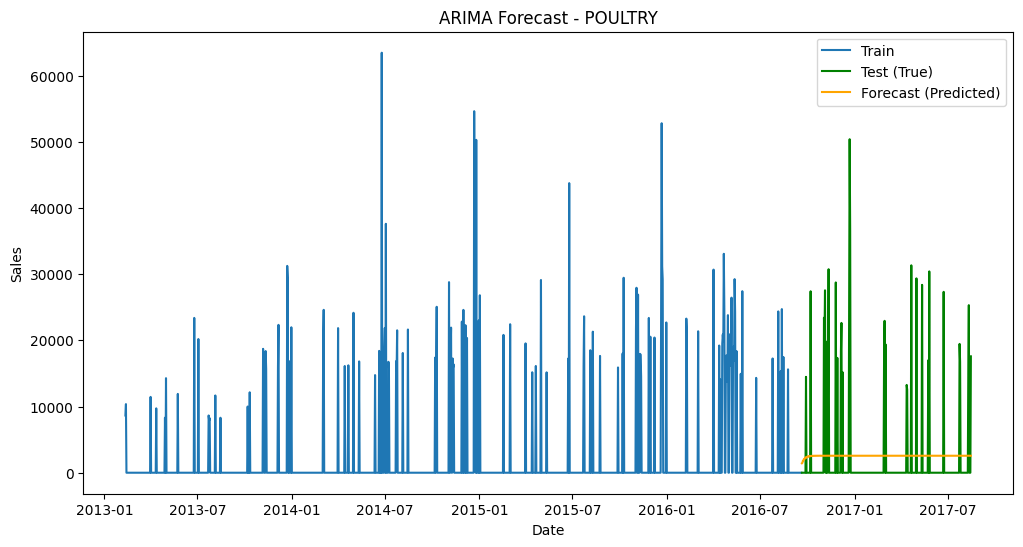

/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


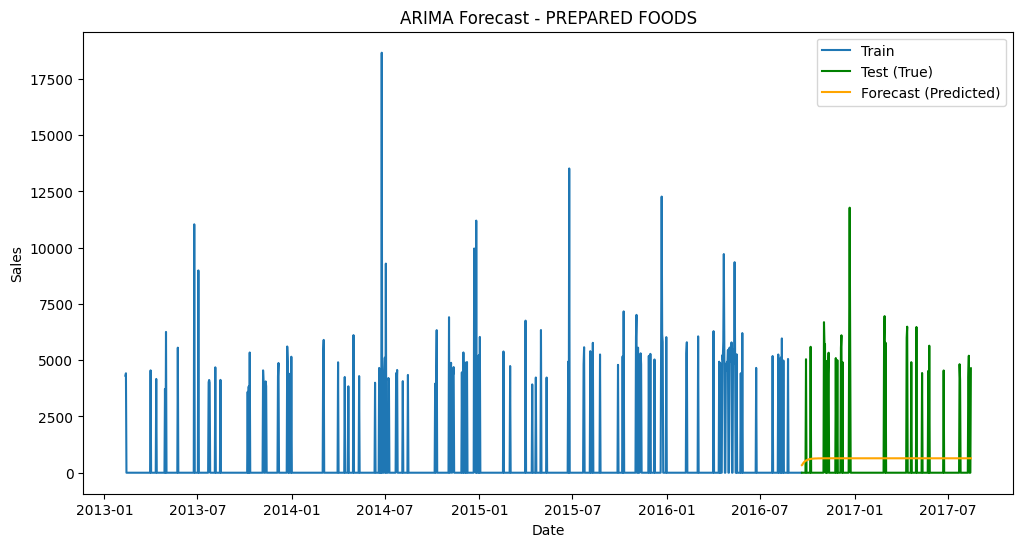

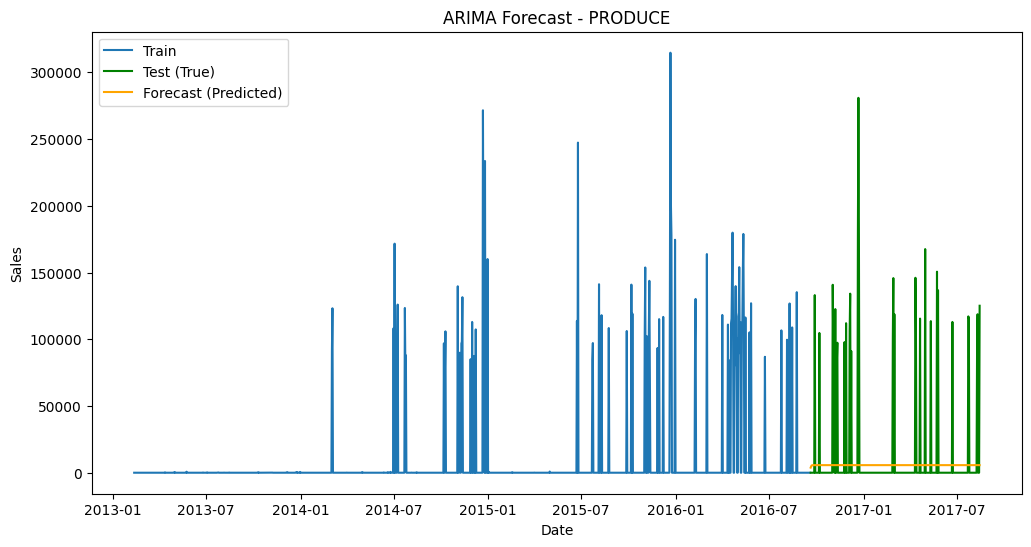

/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


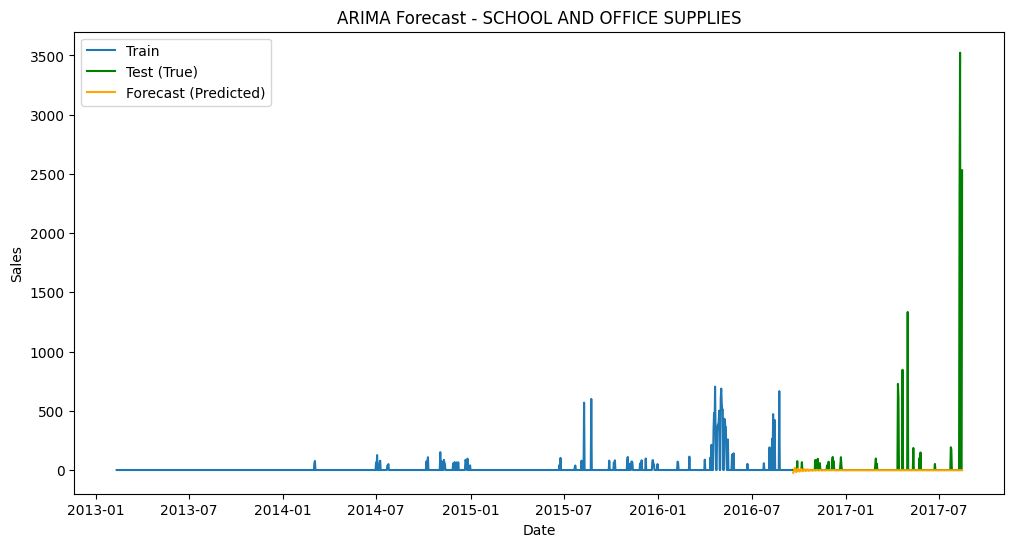

/Users/aizhanm/Desktop/UM-4/demandForecasting/venv_demand/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


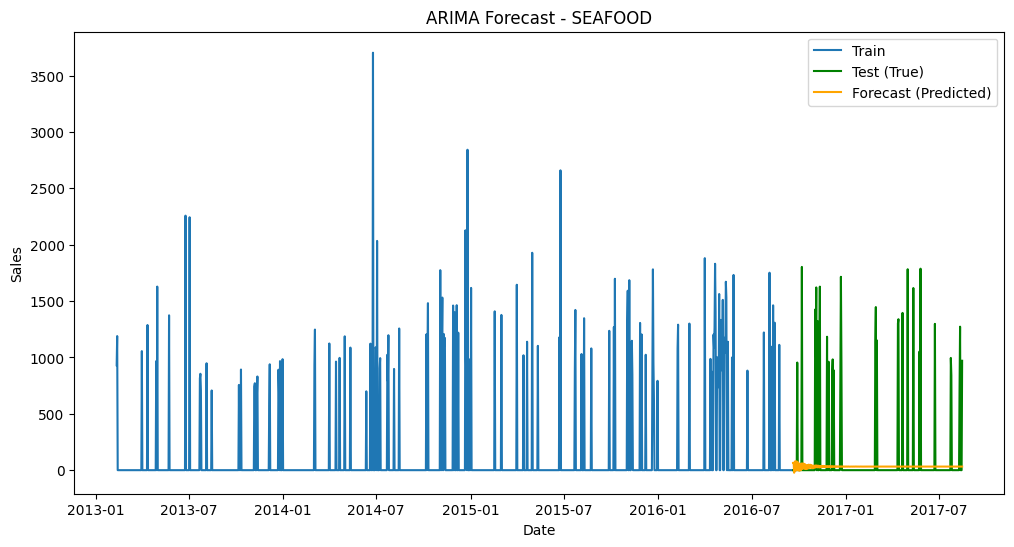

Overall MAE: 4678.6094
Overall WAPE: 1.8119
Overall SMAPE: 1.9093


In [71]:
y_true = []
y_pred = []

for prod_name in ts['family'].unique():
  train, test = get_prod_data(prod_name)

  # --- Fit ARIMA model ---
  model = ARIMA(train['sales'], order=(2,1,3))
  model_fit = model.fit()

  # Forecast over the test period
  forecast = model_fit.forecast(steps=len(test))

  # Plot Train, Test, and Forecast
  plt.figure(figsize=(12,6))
  plt.plot(train.index, train['sales'], label="Train")
  plt.plot(test.index, test['sales'], label="Test (True)", color="green")
  plt.plot(test.index, forecast, label="Forecast (Predicted)", color="orange")

  plt.title(f"ARIMA Forecast - {prod_name}")
  plt.xlabel("Date")
  plt.ylabel("Sales")
  plt.legend()
  plt.show()

  test_units = test['sales']

  y_true.append(test_units.values)
  y_pred.append(forecast.values)


metrics = compute_metrics(y_true, y_pred)
print(f"Overall MAE: {metrics['mae']:.4f}")
print(f"Overall WAPE: {metrics['wape']:.4f}")
print(f"Overall SMAPE: {metrics['smape']:.4f}")